In [1]:
%matplotlib inline
import os, sys, json
import numpy as np
import pandas as pd
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
from preproccess_scripts import get_cancer_mole, juxtapose_mole_and_background

In [2]:
base_width = 1500
base_height = 1000

def load_data(img_path, descr_path, start=0, end=100):
    
    filenames = os.listdir(descr_path)
    
    df = pd.DataFrame(columns= ['diagnosis', 'benign_malignant', 'melanocytic', 'images'])
    
    images = []
    diagnosis = []
    benign_malignant = []
    melanocytic = []
    
    i = start
    
    for file in filenames:
        
        if i > end:
            break

        data = json.load(open(descr_path+file))

        clinical = data["meta"]["clinical"]
        
        if "diagnosis" and "benign_malignant" and "melanocytic" in clinical.keys():
        
            diagnosis.append(clinical["diagnosis"])
            benign_malignant.append(clinical["benign_malignant"])
            melanocytic.append(clinical["melanocytic"])  
            
            img = cv2.imread(str(img_path)+str(file)+".jpg")
            img = cv2.resize(img, (base_width, base_height))
            
            images.append(img)
            
            i += 1
        
    df['diagnosis'] = np.array(diagnosis)
    df['benign_malignant'] = np.array(benign_malignant)
    df['melanocytic'] = np.array(melanocytic)
    
    return df, np.array(images)

In [3]:
df, images = load_data("../data/images/", "../data/descriptions/", start=200, end = 210)

In [4]:
images.shape

(11, 1000, 1500, 3)

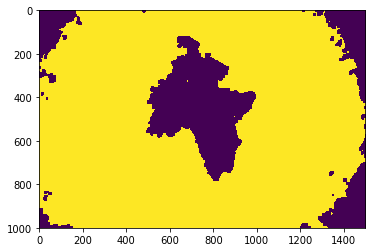

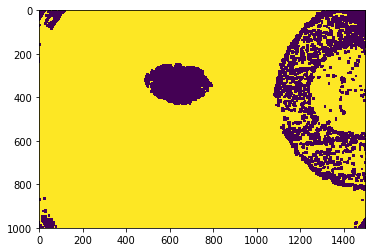

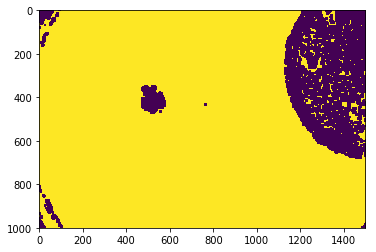

In [5]:
for i in range(3, 6):
    mask = get_cancer_mole(images[i])
    try:
        plt.imshow(mask.reshape(1000, 1500))
        plt.show()
    except:
        pass

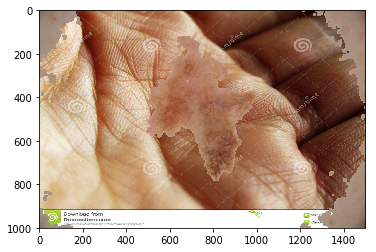

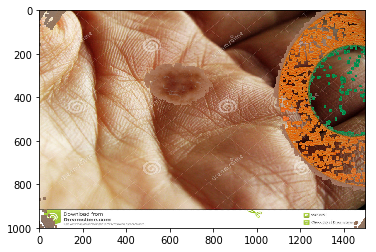

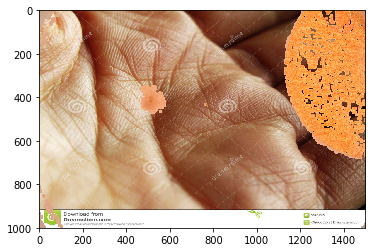

In [10]:
img = images[0]

background = cv2.imread("pictures/hand.jpg")
background = cv2.resize(background, (img.shape[1], img.shape[0]) )


 
for i in range(3,6):

    image = images[i]
    res = juxtapose_mole_and_background(image, background)
    
    im2 = res.copy()
    im2[:, :, 0] = res[:, :, 2]
    im2[:, :, 2] = res[:, :, 0]
    
    plt.imshow(im2)
    plt.show()

In [27]:
from random import random

def get_new_images(images):
    
    new_images = []
    
    back_img_path = "../data/background_images/"
    
    bg_names = os.listdir(back_img_path)
    
    bg_images = []
    
    for name in bg_names:
        bg_images.append(cv2.imread(bg_image_path+name))
    
    for i in range(img.shape[0]):
        
        for i in range(3):
            
            #pick a random backg
            b_img = bg_images[random()*len(bg_images)]
            
            new_images.append(juxtapose_mole_and_background(images[i], b_img))
            
    
    
    return np.array(new_images)
